<a href="https://colab.research.google.com/github/TailUFPB/fundos-imobiliarios/blob/main/FII_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA de FIIs (Fundos de Investimento Imobiliários) para criação de uma métrica de ranqueamento e modelagem de classificação

Análise produzida pelo setor de Dados da Technology and Artificial Intelligence League (TAIL)

Autores: André Hugo, Daniel Cabral, Epitácio Neto, Igor Simões, Joás Filho

Líder: Humberto Navarro

# 1. Introdução

Este notebook tem como finalidade realizar a EDA (Exploratory Data Analysis, ou Análise Exploratória de Dados) de bancos de dados onde se encontram dados sobre fundos imobiliários brasileiros, de forma que o escopo do assunto seja, analiticamente, entendido. Desta forma, o notebook está dividido em três etapas:

1.   Análise de uma base contendo os dados de FIIs (Fundos de Investimento Imobiliários) em 2021
2.   Análise de uma base contendo os dados de FIIs em 2019
3.   Comparação entre as FIIs de 2021 vs 2019

Para as duas bases de dados, utilizaremos as mesmas técnicas e representações para a visualização dos dados, de forma que seja estabelecida um padrão analítico único. Neste, encontraremos as seguintes aplicações:

*   Análise de dados categóricos
*   Análise de uma variável
*   Análise multivariável
*   Análise comparativa e variancias





### Bibliotecas utilizadas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. FIIs de 2021

### Leitura e visualização da base de dados

In [ ]:
url = 'https://raw.githubusercontent.com/TailUFPB/fundos-imobiliarios/main/CSV_EDA.csv'
data = pd.read_csv(url)
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Média,DY (6M)Média,DY (12M)Média,DY Ano,Variação Preço,Rentab.Período,Rentab.Acumulada,PatrimônioLíq.,VPA,P/VPA,VacânciaFísica,QuantidadeAtivos
0,0,ABCP11,Shoppings,70.84,959.0,0.05,0.06,0.43,0.45,0.33,1.30,1.82,1.88,1.90,1.078043e+09,88.34,80.0,9.10,1
1,1,AFCR11,Híbrido,110.30,1536.0,1.08,0.96,0.94,0.90,0.00,4.54,-3.03,-2.10,1.90,1.234449e+08,103.97,106.0,5.40,0
2,3,AIEC11,Lajes Corporativas,86.27,16775.0,0.57,0.65,0.64,0.62,0.00,3.12,-3.30,-2.67,-2.90,4.836033e+08,100.23,86.0,0.00,2
3,4,ALMI11,Lajes Corporativas,1160.00,54.0,0.00,0.00,0.00,0.00,0.00,0.00,2.27,2.27,-28.29,2.294239e+08,2063.59,56.0,68.15,1
4,5,ALZR11,Logística,128.00,11604.0,0.68,0.54,0.49,0.41,0.40,1.86,-3.29,-2.77,-2.02,4.591767e+08,102.51,125.0,0.00,13


In [ ]:
df.drop(index = 1, columns='Unnamed: 0', inplace = True)
df.set_index('Códigodo fundo', inplace = True)
df.head()

,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Média,DY (6M)Média,DY (12M)Média,DY Ano,Variação Preço,Rentab.Período,Rentab.Acumulada,PatrimônioLíq.,VPA,P/VPA,VacânciaFísica,QuantidadeAtivos
Códigodo fundo,,,,,,,,,,,,,,,,,
ABCP11,Shoppings,70.84,959.0,0.05,0.06,0.43,0.45,0.33,1.30,1.82,1.88,1.90,1.078043e+09,88.34,80.0,9.10,1
AIEC11,Lajes Corporativas,86.27,16775.0,0.57,0.65,0.64,0.62,0.00,3.12,-3.30,-2.67,-2.90,4.836033e+08,100.23,86.0,0.00,2
ALMI11,Lajes Corporativas,1160.00,54.0,0.00,0.00,0.00,0.00,0.00,0.00,2.27,2.27,-28.29,2.294239e+08,2063.59,56.0,68.15,1
ALZR11,Logística,128.00,11604.0,0.68,0.54,0.49,0.41,0.40,1.86,-3.29,-2.77,-2.02,4.591767e+08,102.51,125.0,0.00,13
ARCT11,Híbrido,108.14,1762.0,1.00,0.82,2.25,1.74,1.53,7.48,9.91,10.81,-5.50,1.625354e+08,101.74,106.0,5.40,2


In [ ]:
df.dtypes

Setor                object
Preço Atual         float64
Liquidez Diária     float64
Dividendo           float64
DividendYield       float64
DY (3M)Média        float64
DY (6M)Média        float64
DY (12M)Média       float64
DY Ano              float64
Variação Preço      float64
Rentab.Período      float64
Rentab.Acumulada    float64
PatrimônioLíq.      float64
VPA                 float64
P/VPA               float64
VacânciaFísica      float64
QuantidadeAtivos      int64
dtype: object

##Dados Categoricos

O único dado categórico presente na tabela é de Setor, portanto, faremos apenas a análise categórica deste.

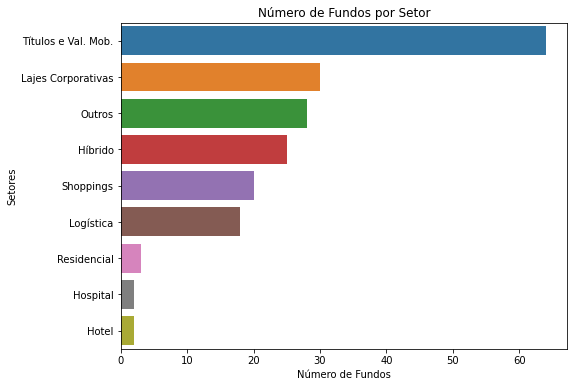

In [ ]:
plt.figure(figsize = (8,6))
ax = sns.countplot(y='Setor', 
              data = df, 
              order = df.Setor.value_counts(ascending = False).index)

ax.set_title('Número de Fundos por Setor')
plt.xlabel('Número de Fundos')
plt.ylabel('Setores')
plt.show()

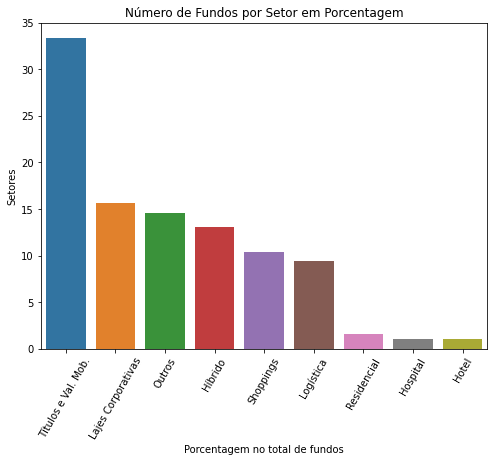

In [ ]:
setor_norm = df.Setor.value_counts(normalize = True)

plt.figure(figsize = (8,6))
ax = sns.barplot(x = setor_norm.index,
                   y = setor_norm.values * 100)

ax.set_title('Número de Fundos por Setor em Porcentagem')
plt.xlabel('Porcentagem no total de fundos')
plt.ylabel('Setores')
plt.xticks(rotation = 60)
plt.show()

Percebe-se que existe uma grande quantidade de Títulos e Valores Imobiliários e um pequeno numero de fundos de hóteis, hospitais e residenciais. 

##Variáveis Numéricas

Nesta etapa, analisaremos (por meio de boxplots, violinplots e histogramas) as variáveis individualmente, com isto, podemos criar uma ideia inicial dos dados tratados para análises mais específicas e/ou complexas.

In [ ]:
df.describe()

,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Média,DY (6M)Média,DY (12M)Média,DY Ano,Variação Preço,Rentab.Período,Rentab.Acumulada,PatrimônioLíq.,VPA,P/VPA,VacânciaFísica,QuantidadeAtivos
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,1.920000e+02,192.000000,192.000000,192.000000,192.000000
mean,136.514583,15795.375000,0.745677,0.631562,0.585677,0.528906,0.422135,2.713125,-1.809219,-1.189115,-2.844167,5.528597e+08,156.367917,93.270833,8.639740,3.380208
std,248.899513,28668.819991,0.724019,0.292329,0.313418,0.340147,0.334935,1.322521,3.745772,3.785823,8.188210,6.874178e+08,330.242556,16.799077,12.511928,7.106241
min,2.970000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.280000,-18.850000,-37.830000,3.152457e+06,6.890000,34.000000,0.000000,0.000000
25%,83.285000,536.750000,0.417500,0.490000,0.450000,0.312500,0.000000,1.927500,-3.597500,-2.957500,-6.145000,1.088151e+08,94.725000,85.750000,5.225000,0.000000
50%,98.555000,3306.500000,0.640000,0.630000,0.590000,0.550000,0.505000,2.680000,-1.610000,-0.940000,-2.000000,2.926230e+08,99.545000,97.000000,5.400000,1.000000
75%,110.262500,20924.750000,0.900000,0.770000,0.740000,0.722500,0.640000,3.395000,0.350000,0.935000,1.935000,6.443246e+08,106.925000,103.000000,5.400000,3.000000
max,2853.000000,218271.000000,7.150000,1.640000,2.250000,1.740000,1.530000,8.080000,10.900000,12.600000,14.480000,3.847357e+09,3609.270000,132.000000,81.600000,64.000000


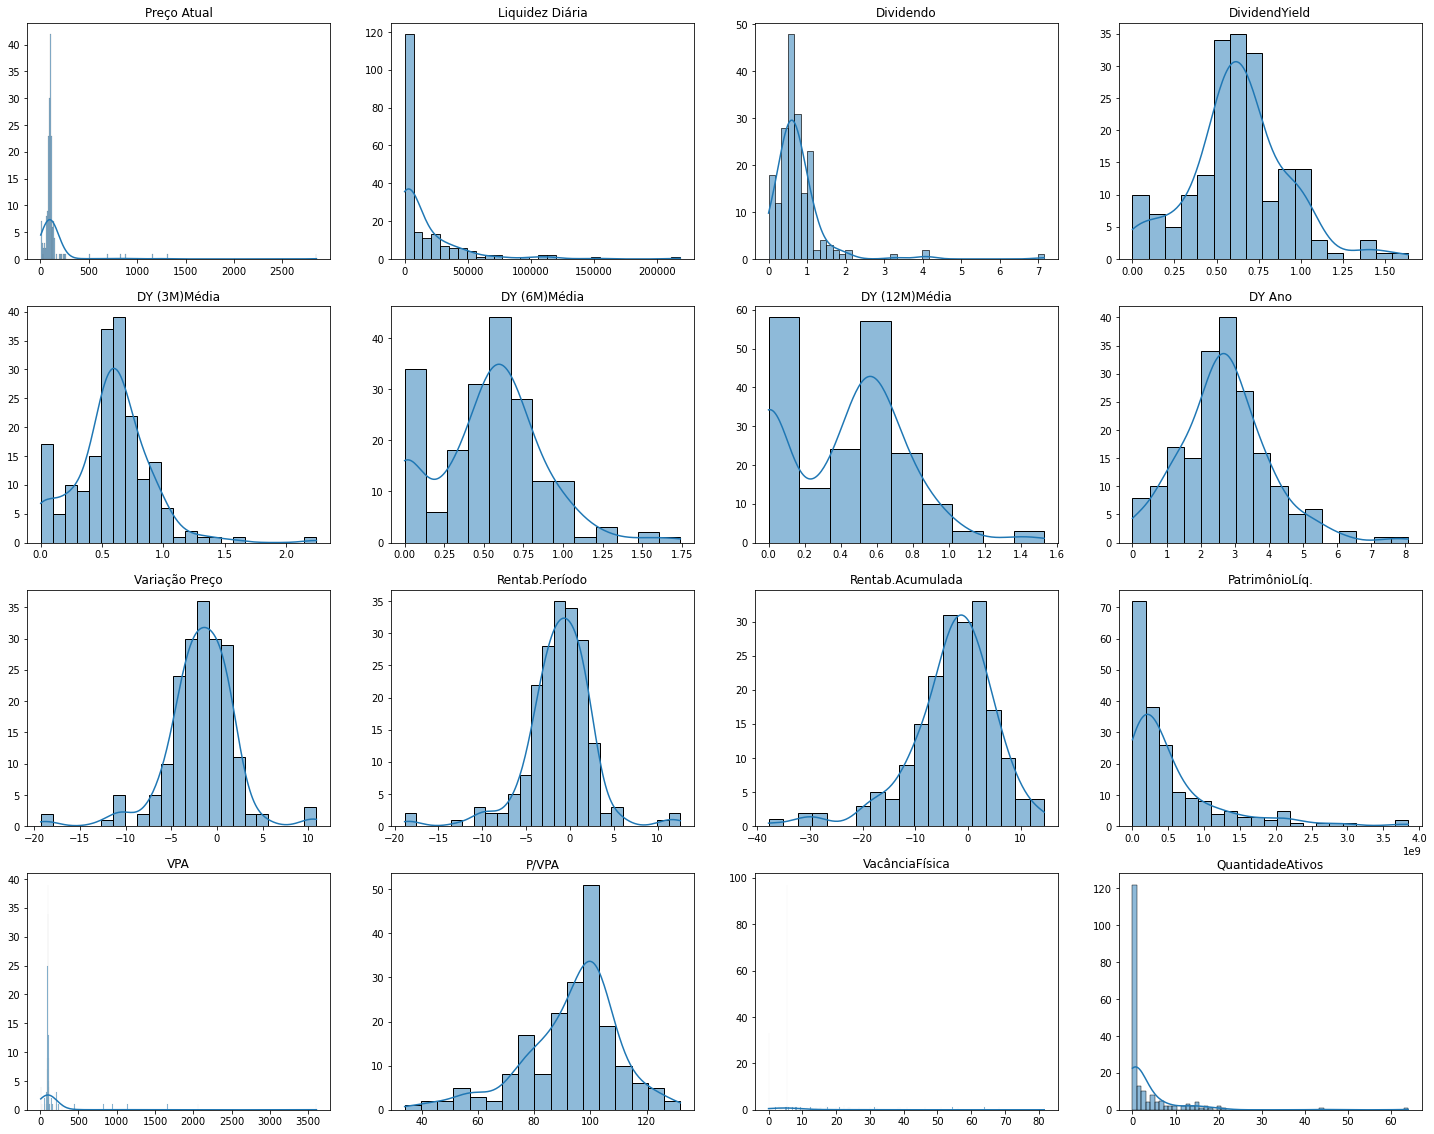

In [ ]:
#plot dos histogramas

plt.figure(figsize=(25,20))

for i in range(1,17):
  ax = plt.subplot(4,4,i)
  sns.histplot(data = df.iloc[:,i], kde = True)
  ax.set_title(df.columns[i])
  ax.set_xlabel("")
  ax.set_ylabel('')

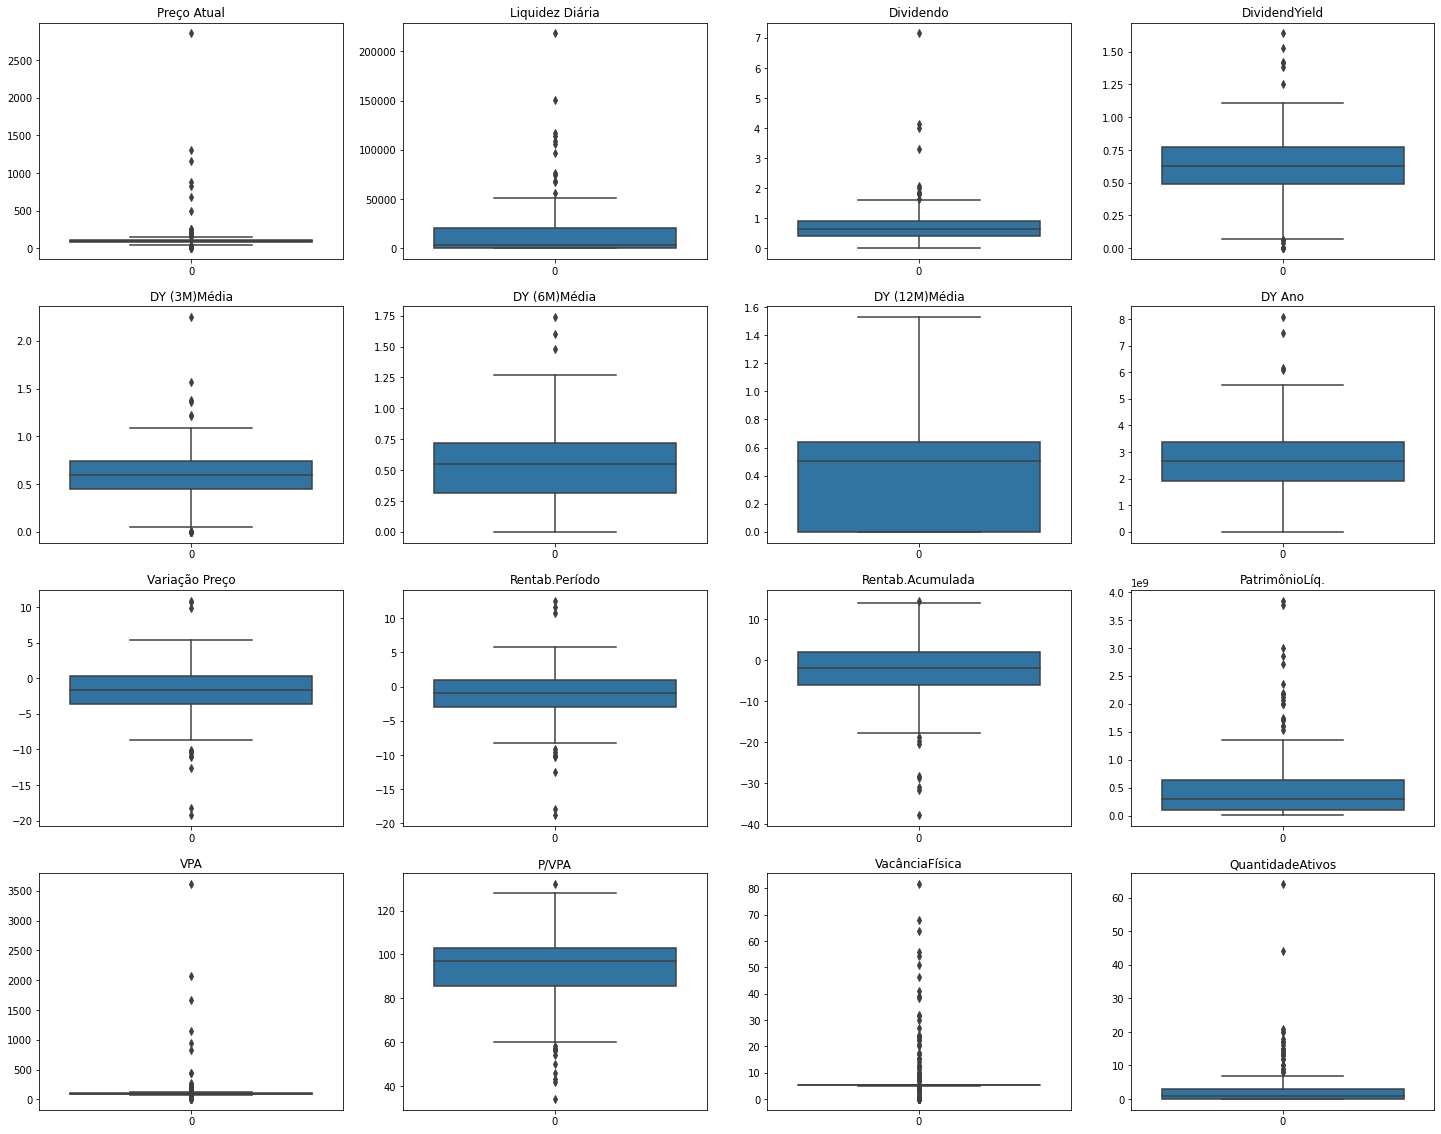

In [ ]:
#plot dos boxplots

plt.figure(figsize=(25,20))

for i in range(1,17):
  ax = plt.subplot(4,4,i)
  sns.boxplot(data = df.iloc[:,i])
  ax.set_title(df.columns[i])
  ax.set_xlabel("")
  ax.set_ylabel('')
  #ax.legend(df.columns[i].describe())

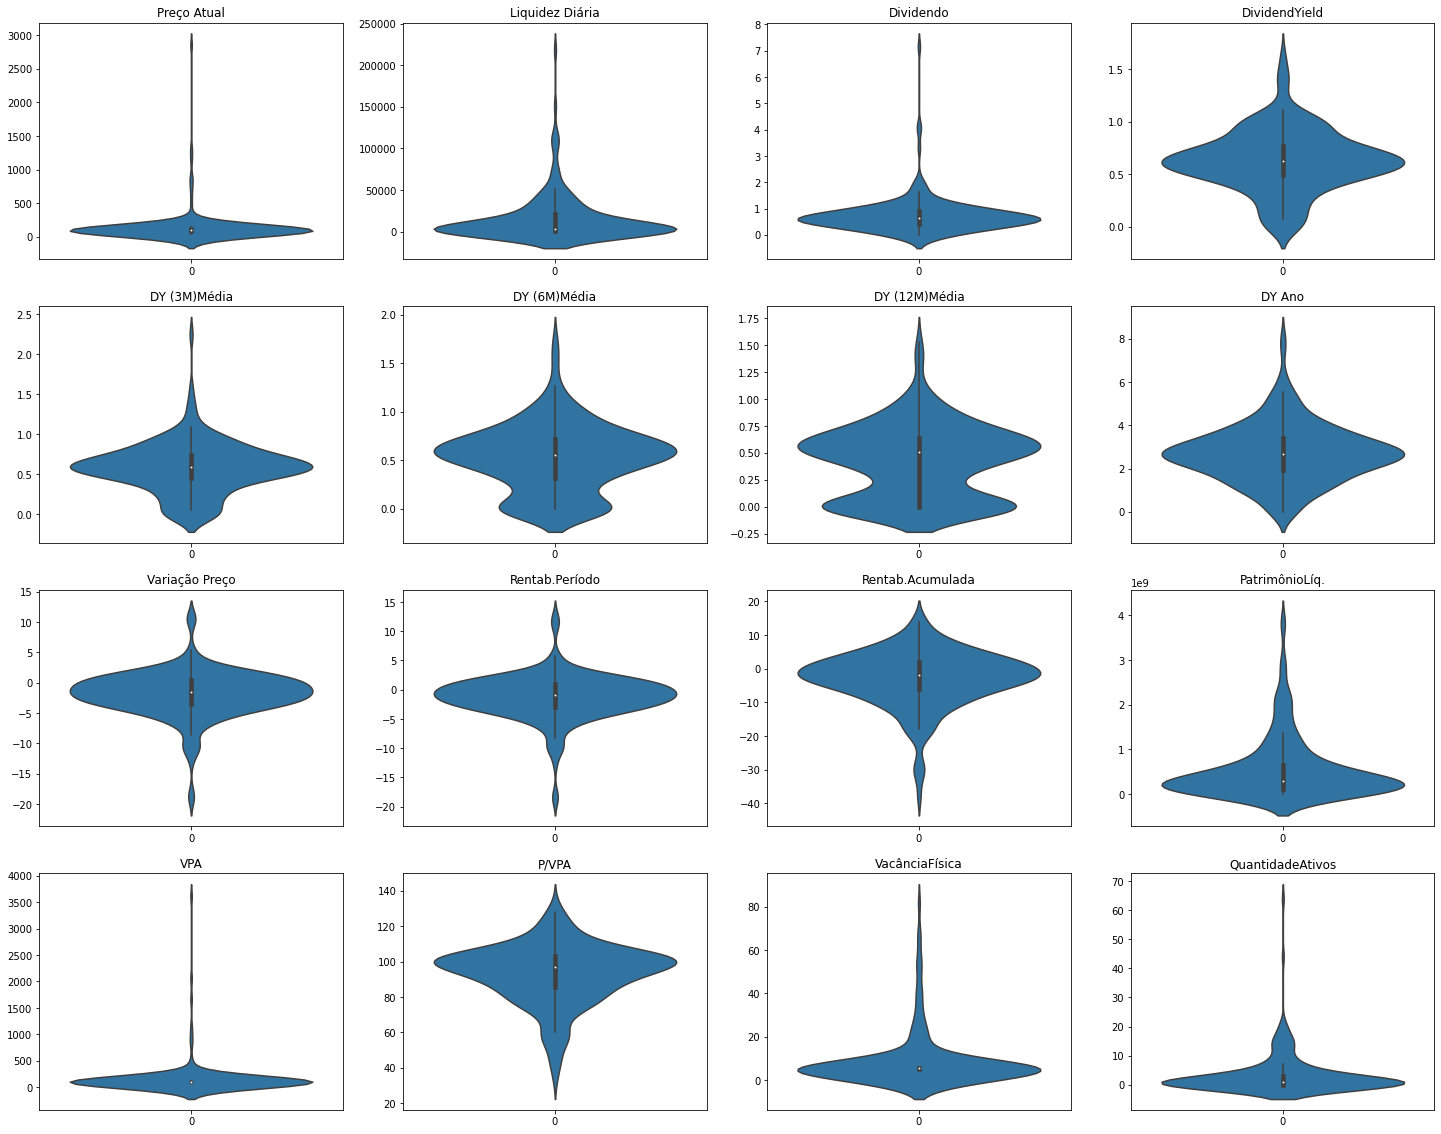

In [ ]:
#plot dos violinplots

plt.figure(figsize=(25,20))

for i in range(1,17):
  ax = plt.subplot(4,4,i)
  sns.violinplot(data = df.iloc[:,i])
  ax.set_title(df.columns[i])
  ax.set_xlabel("")
  ax.set_ylabel('')

Percebe-se que esse período não foi bom para os fundos em termos de Variação de Preço e rentabilidade, visto que tanto que médiana desses valores é negativa, com os terceiros quartis (75%) próximos de 0. O DY anual da maior parte dos fundos fica entre 2 e 4%, indicando que fundos com valores acima disso se sobressaem. 

A liquidez de pouco mais da metade dos papeis é baixa, embora uma pequena quantidade de ativos apresentem uma alta liquidez.

Pouco mais da metade dos fundos não possuem ativos físicos, o que é coerente visto a alta quantidade de ativos da modalidade "Títulos e Valores Imobiliários", "Híbridos" e "Outros". Visto que os títulos sem ativos foram considerados com 0% de vacância física, isso também reflete numa baixa mediana do atributo.

Quanto ao P/VPA, observa-se que mais da metade das ações estão sendo negociados abaixo do seu valor patrimonial e que mesmo valor que indica o fim dos terceiro quartil (75%) está em 106%, muito próximo do valor patrimonial, o que é um indicativo de que os fundos estão baratos.

##Análise Multivariável

In [ ]:
cols = ["Setor","Preço Atual", "Liquidez Diária", "DY Ano", "Variação Preço", "Rentab.Acumulada", "P/VPA", "VacânciaFísica"]

<Figure size 2160x2160 with 0 Axes>

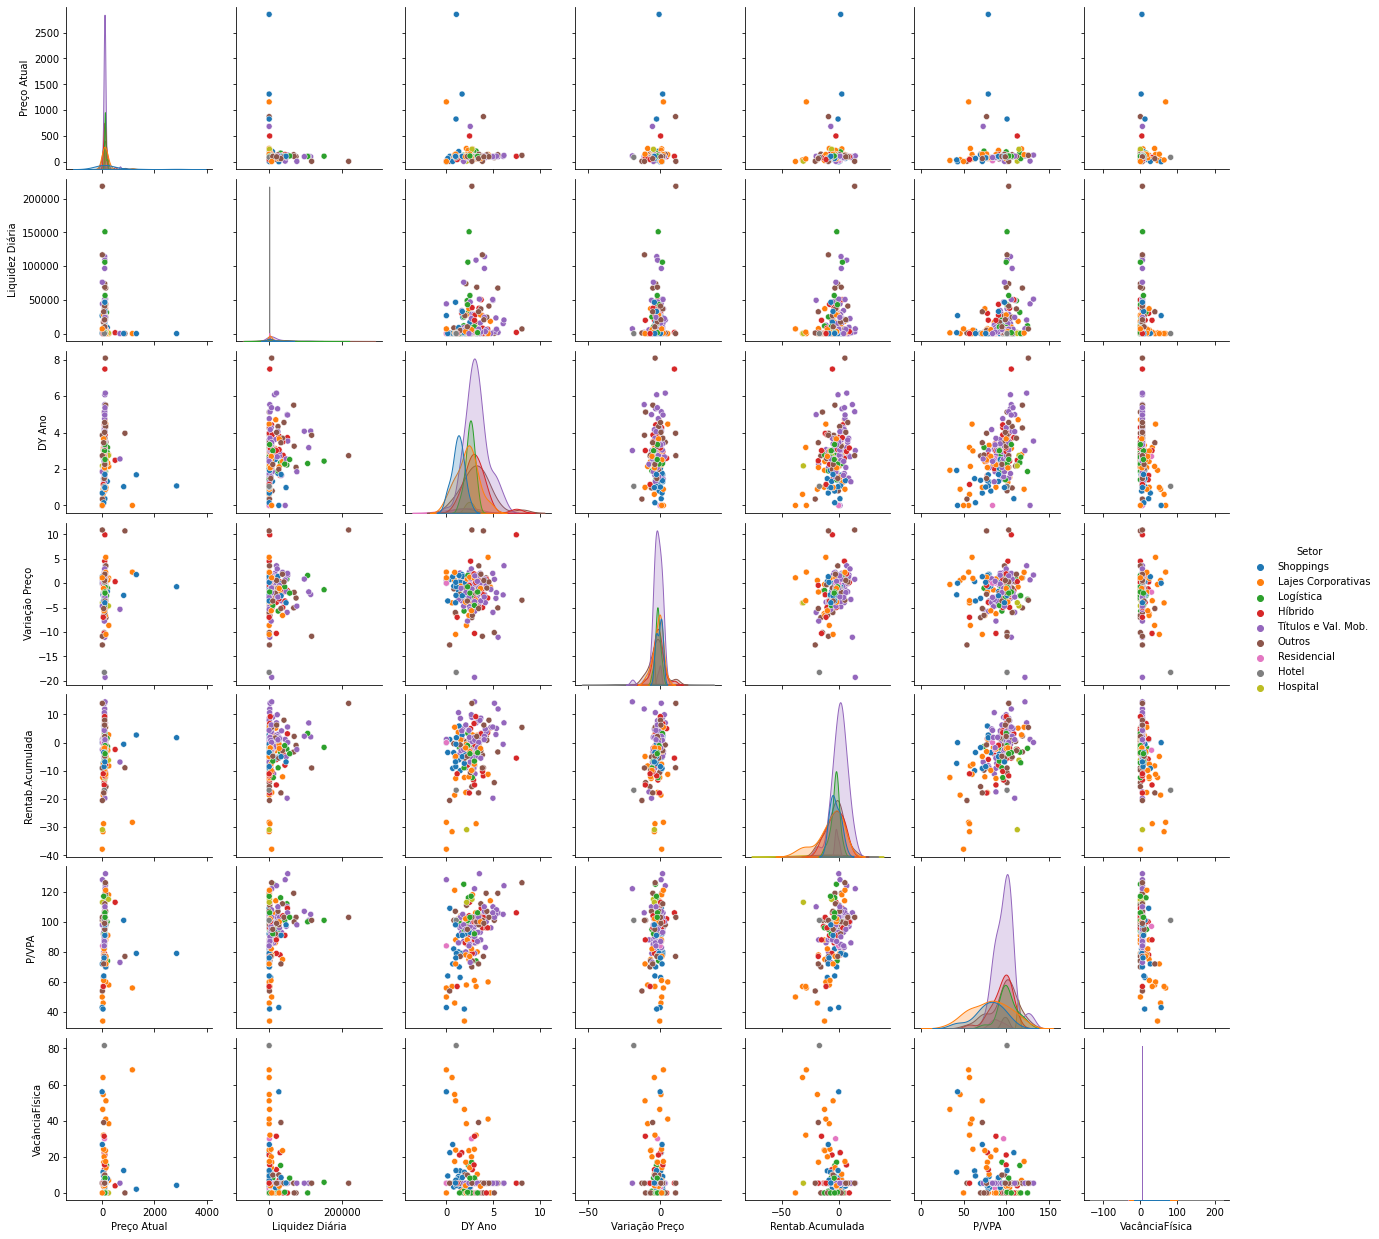

In [ ]:
fig = plt.figure(figsize = (30,30))

sns.pairplot(data = df[cols], hue = 'Setor')

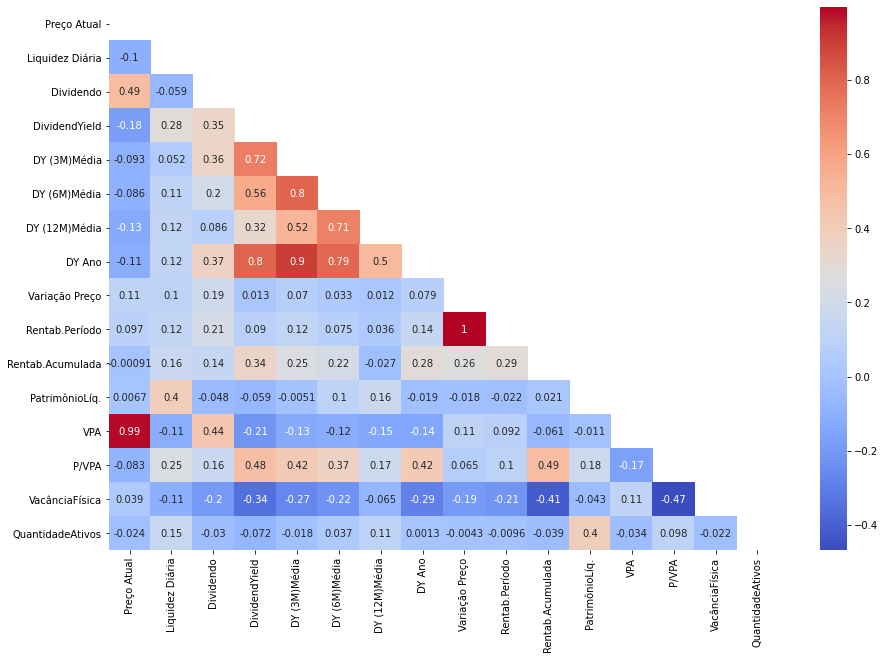

In [ ]:
figure = plt.figure(figsize=(15,10))

corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr,mask = mask, annot = True, cmap='coolwarm')

Podemos destacar, diante do gráfico de correlação, que a Rentab. Período representa, praticamente, o mesmo peso de contribuição que Variação Preço, desta forma, uma das soluções, caso aconteça o mesmo comportamento com diferentes bases de dados, é suficiente escolher apenas uma destas colunas para serem mantidas, devido à alta correlação entre estas. O mesmo argumento é válido para os seguintes casos:


*   VPA com Preço Atual;
*   DY Ano com DY(3M) Média.

Ao longo da integração de mais dados, analisaremos se a situação destes destacados persistem, para podermos tratá-los devidamente.




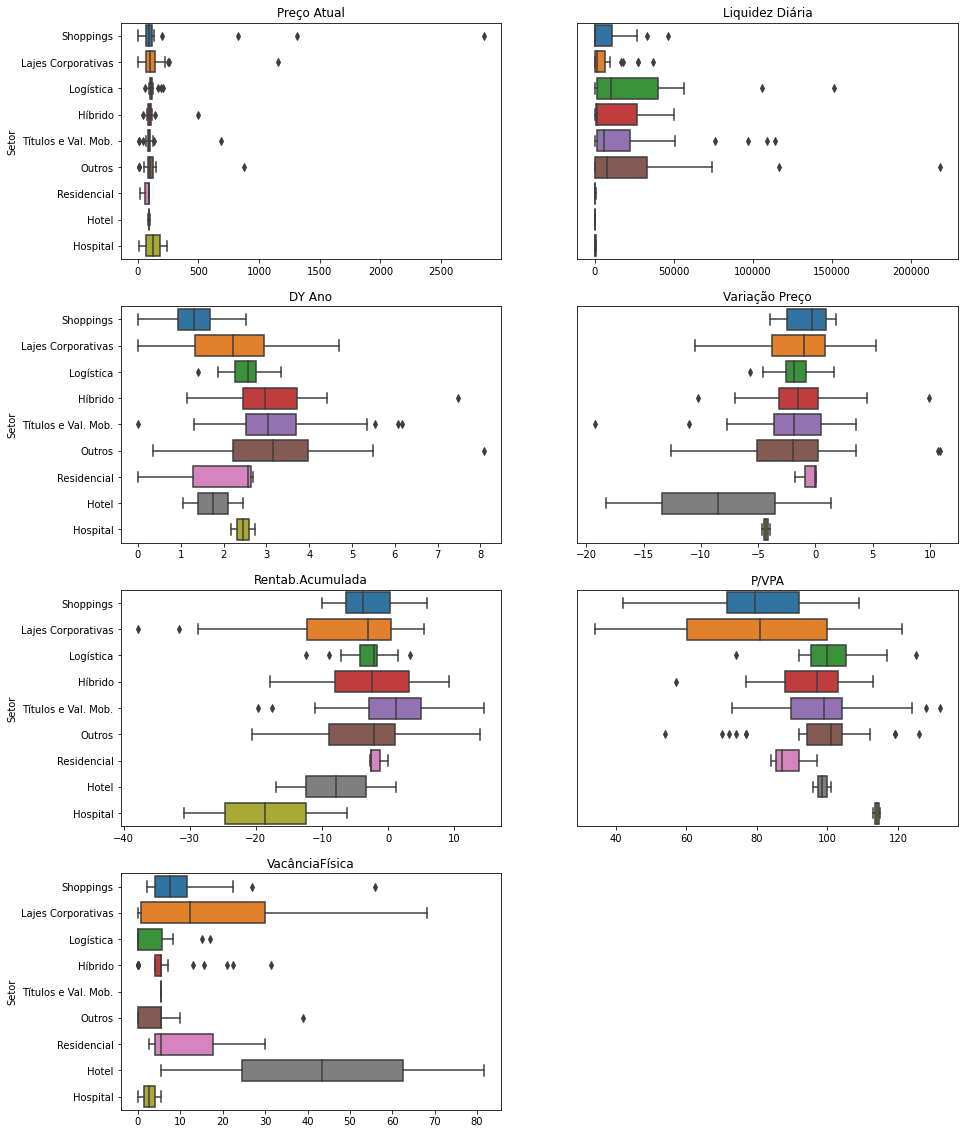

In [ ]:
plt.figure(figsize=(15,20))

for i in range(1,len(cols)):
  ax = plt.subplot(4,2,i)
  sns.boxplot(x = df[cols[i]], y = df.Setor)
  ax.set_title(cols[i])
  ax.set_xlabel('')
  if i % 2 == 0:
    ax.set_ylabel('')
    ax.set_yticks([])

**Preço atual**: Notamos que Shoppings possui representantes bem acima da margem normal. Com relação aos preços de fundos residenciais, percebemos que, além de não produzirem fundos com dados "anormais", a distribuição dos dados indicam que até mesmo seus valores máximos são muito próximos do terceiro quartil. Hospital também é um setor "bem comportado" ao que se refere os preços atuais, demonstra consistência nos valoers de preços atribuidos neste setor.

**Liquidez Diária**: Podemos utilizar tendências devido à condições adversas no país para compreender certos comportamentos compostos graficamente. Por exemplo, devido às características de condução da saúde que é, majoritariamente pública e, quando se diz respeito à hospitais privados, utilizamos planos de saúde com intermédio dos bancos. Por esses mortivos, a liquidez diária de Hospitais é pequena, diante do contexto do país. Outra condição adversa é, inevitavelmente, a pandemia do COVID-19 presente durante a análise desta fase, em específico. Por isto, a liquidez diária de Hotéis é reproduzida com baixos valores. É fato que a influência da COVID-19 tenha influenciado em boa parte da base, mas é possível perceber aqueles setores mais afetados.

**DY Ano**: Neste, conseguimos, de forma menos profunda e complexa, analisar a qualidade de um fii com base no setor. Por exemplo, Hospital, Hotel e Shoppings possuem uma mediana próxima à uma média entre o primeiro e terceiro quartil e, com excessão de Shoppings, possuem máximos e mínimos próximos da realidade comum daquele setor.

**Variação Preço e Rentab. Acumulada**: Nestes dois, podemos ver, de forma mais clara, os agravantes devido à pandemia. Ambos possuem descrescimentos na maioria dos setores, tanto que, em todos os setores, as medianas possuem valores negativos, bem como, dos poucos que possuem terceiro quartil positivos, a maiora é próxima de zero.

**P/VPA**: Percebemos que, nos setores de Hospital, Hotel e Residencial, o intervalo em que estes fundo variam são, relativamente, pequenos, ao compararmos, por exemplo, com Shoppings e Lajes Coorporativas, onde seus máximos e mínimos estão bem distantes da mediana dos outros fundos.


# 3. Análise das FIIs em 2019

Os processos e aplicações desta parte são idênticas a etapa passada, portanto, definimos a base que será trabalhada e visualizamos, de forma sucinta, os dados presentes nela, em seguida partimos para a análise univariável e multivariável. O que irá diferenciá-las é justamente o maior contexto que, após analisarmos a base anterior, de forma com que ela auxilie e talvez nos faça encontrar informações que só podiam ser encontradas após a análise a partir de outro contexto (no nosso caso, o contexto anterior são as FIIs em 2021 e o contexto atual são as FIIs em 2019).

In [ ]:
url2 = 'https://raw.githubusercontent.com/TailUFPB/fundos-imobiliarios/main/CSV_EDA_2019.csv'
data2 = pd.read_csv(url2)
df2 = pd.DataFrame(data2)
df2.head()

,Unnamed: 0,Códigodo fundo,Setor,Preço Atual,Volume (21D),Dividendo,DividendYield,DY (3M)Média,DY (6M)Média,DY (12M)Média,DY Ano,Variação Preço,Rentab.Período,Rentab.Acumulada,PatrimônioLíq.,VPA,P/VPA,VacânciaFísica,QuantidadeAtivos
0,0,ABCP11,Shoppings,9435.00000,4727.0,0.1300,0.6937,0.5843,0.5517,0.5376,0.6937,0.0000,0.6937,0.6937,9.074805e+08,14.87,63441.0,1.200,1
1,1,AEFI11,Outros,15990.00000,1277.0,1.2200,0.7531,0.7627,0.8265,0.7826,0.7531,0.0000,0.7531,0.7531,1.139175e+08,151.39,10562.0,0.000,2
2,2,AGCX11,Outros,1.19001,231.0,7.5000,0.6303,0.6057,0.6483,0.6364,0.6303,0.0000,0.6303,0.6303,4.324066e+08,1067.67,11146.0,5.715,41
3,4,ALZR11,Outros,9829.00000,3911.0,0.6555,0.6622,0.6880,0.6914,0.6488,7.7861,5.2979,5.9952,3.3298,9.710990e+07,97.40,10092.0,0.000,2
4,5,ATSA11,Shoppings,11399.00000,0.0,0.1000,0.0998,0.1861,0.1251,0.1224,0.0998,0.0000,0.0998,0.0998,1.849389e+08,107.82,10572.0,22.300,1


In [ ]:
df2.drop(index = 1, columns='Unnamed: 0', inplace = True)
df2.set_index('Códigodo fundo', inplace = True)
df2.head()

,Setor,Preço Atual,Volume (21D),Dividendo,DividendYield,DY (3M)Média,DY (6M)Média,DY (12M)Média,DY Ano,Variação Preço,Rentab.Período,Rentab.Acumulada,PatrimônioLíq.,VPA,P/VPA,VacânciaFísica,QuantidadeAtivos
Códigodo fundo,,,,,,,,,,,,,,,,,
ABCP11,Shoppings,9435.00000,4727.0,0.1300,0.6937,0.5843,0.5517,0.5376,0.6937,0.0000,0.6937,0.6937,9.074805e+08,14.87,63441.0,1.200,1
AGCX11,Outros,1.19001,231.0,7.5000,0.6303,0.6057,0.6483,0.6364,0.6303,0.0000,0.6303,0.6303,4.324066e+08,1067.67,11146.0,5.715,41
ALZR11,Outros,9829.00000,3911.0,0.6555,0.6622,0.6880,0.6914,0.6488,7.7861,5.2979,5.9952,3.3298,9.710990e+07,97.40,10092.0,0.000,2
ATSA11,Shoppings,11399.00000,0.0,0.1000,0.0998,0.1861,0.1251,0.1224,0.0998,0.0000,0.0998,0.0998,1.849389e+08,107.82,10572.0,22.300,1
BBFI11B,Lajes Corporativas,2.28397,205.0,25.7775,1.0790,1.1419,1.2206,1.0797,1.0790,0.0000,1.0790,1.0790,3.511548e+08,2701.19,8455.0,38.590,2


Durante a análise e processamento destes dados, encontramos erros oriundos de um problema com o scrapping da base de dados, portanto, verificamos este problema junto com a página-fonte onde extraímos os dados para averiguar qual seria este erro. Portanto, após feita a análise, concluímos que a posição da vírgula estava ocasionando este problema. Assim, criamos operações que corrigem este erro específico, desta forma, a operação seguinte é para o propósito explicado.

In [ ]:
#Tratamento da base para condizer com os valores de preços reais devido a um erro durante o scrapping da base.

df2['Preço Atual'] = np.where(
    df2['Preço Atual'] > 100,               
    df2['Preço Atual'] * 0.01,  
    df2['Preço Atual'] * 1000           
)

df2['P/VPA'] = df2['P/VPA'].div(100)

## Dados categóricos

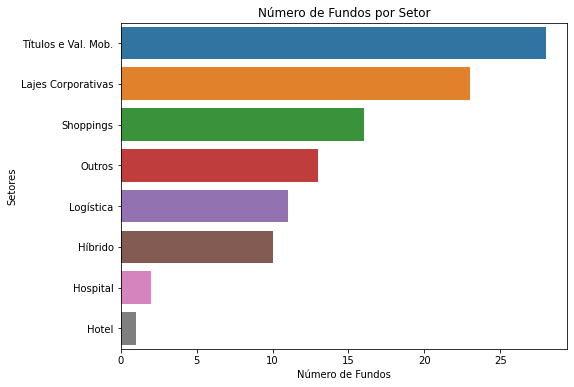

In [ ]:
plt.figure(figsize = (8,6))
ax = sns.countplot(y='Setor', 
              data = df2, 
              order = df2.Setor.value_counts(ascending = False).index)

ax.set_title('Número de Fundos por Setor')
plt.xlabel('Número de Fundos')
plt.ylabel('Setores')
plt.show()

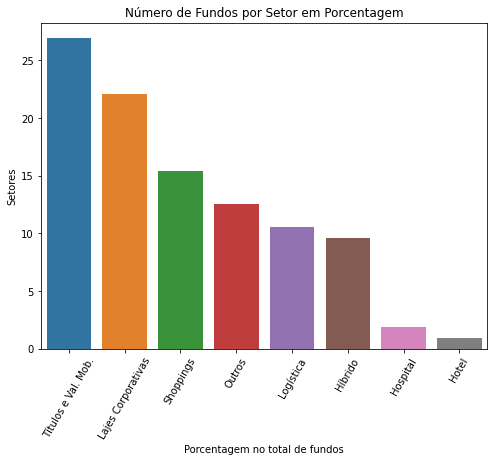

In [ ]:
setor_norm = df2.Setor.value_counts(normalize = True)

plt.figure(figsize = (8,6))
ax = sns.barplot(x = setor_norm.index,
                   y = setor_norm.values * 100)

ax.set_title('Número de Fundos por Setor em Porcentagem')
plt.xlabel('Porcentagem no total de fundos')
plt.ylabel('Setores')
plt.xticks(rotation = 60)
plt.show()

Percebemos mudanças significativas quando comparamos o gráfico de 2019 com o atual, tanto na proporção, onde os títulos não possuem uma discrepância tão grande com relação aos outros setores. Na verdade, vemos uma proporção próxima entre os títulos com as lajes coorporativas, anteriormente, bem como a quantidade de shoppings eram maiores até um tempo atrás. 

## Variáveis Numéricas

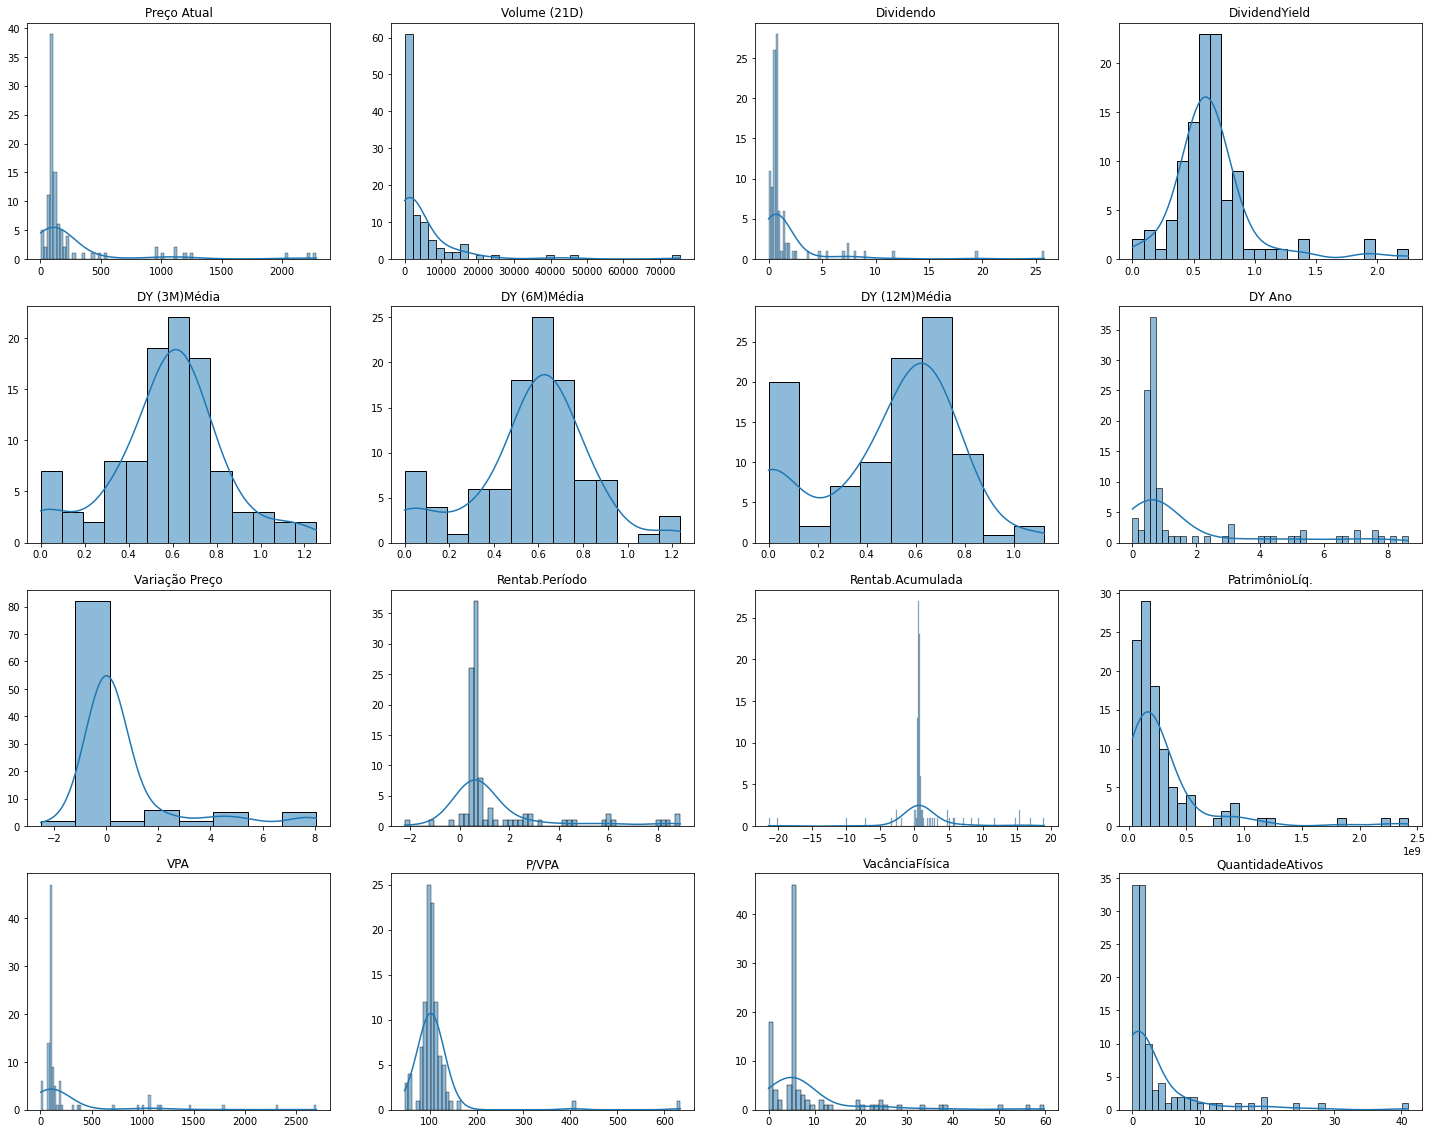

In [ ]:
#plot dos histogramas

plt.figure(figsize=(25,20))

for i in range(1,17):
  ax = plt.subplot(4,4,i)
  sns.histplot(data = df2.iloc[:,i], kde = True)
  ax.set_title(df2.columns[i])
  ax.set_xlabel("")
  ax.set_ylabel('')

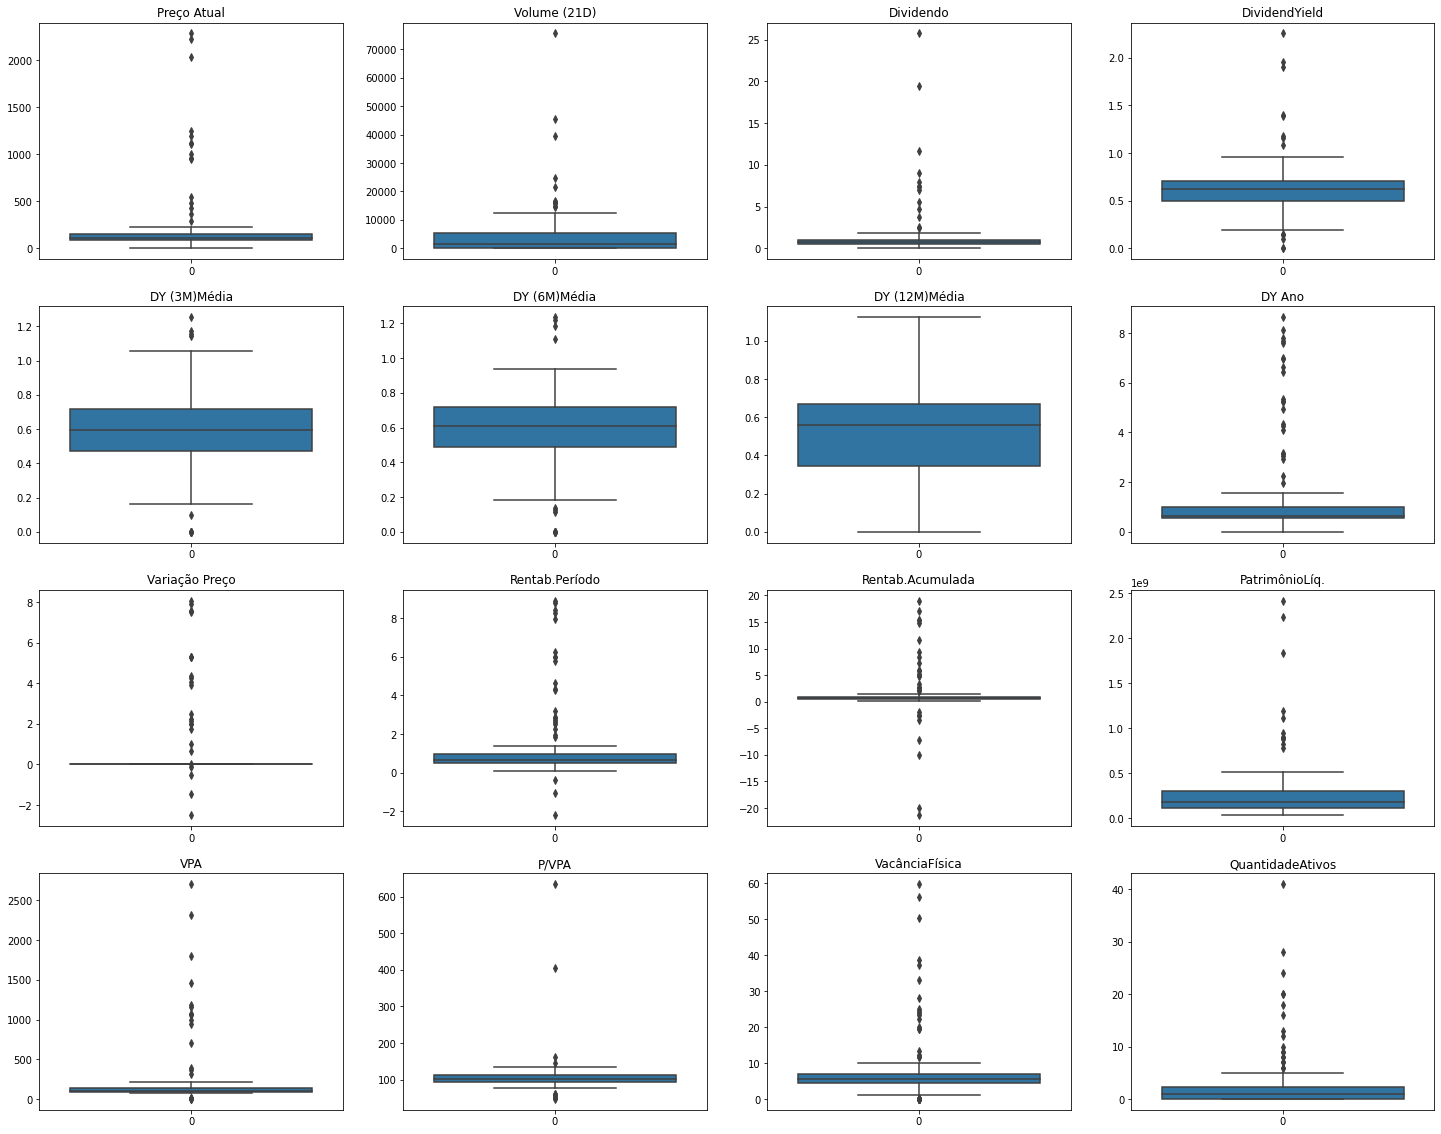

In [ ]:
#plot dos boxplots

plt.figure(figsize=(25,20))

for i in range(1,17):
  ax = plt.subplot(4,4,i)
  sns.boxplot(data = df2.iloc[:,i])
  ax.set_title(df2.columns[i])
  ax.set_xlabel("")
  ax.set_ylabel('')
  #ax.legend(df2.columns[i].describe())

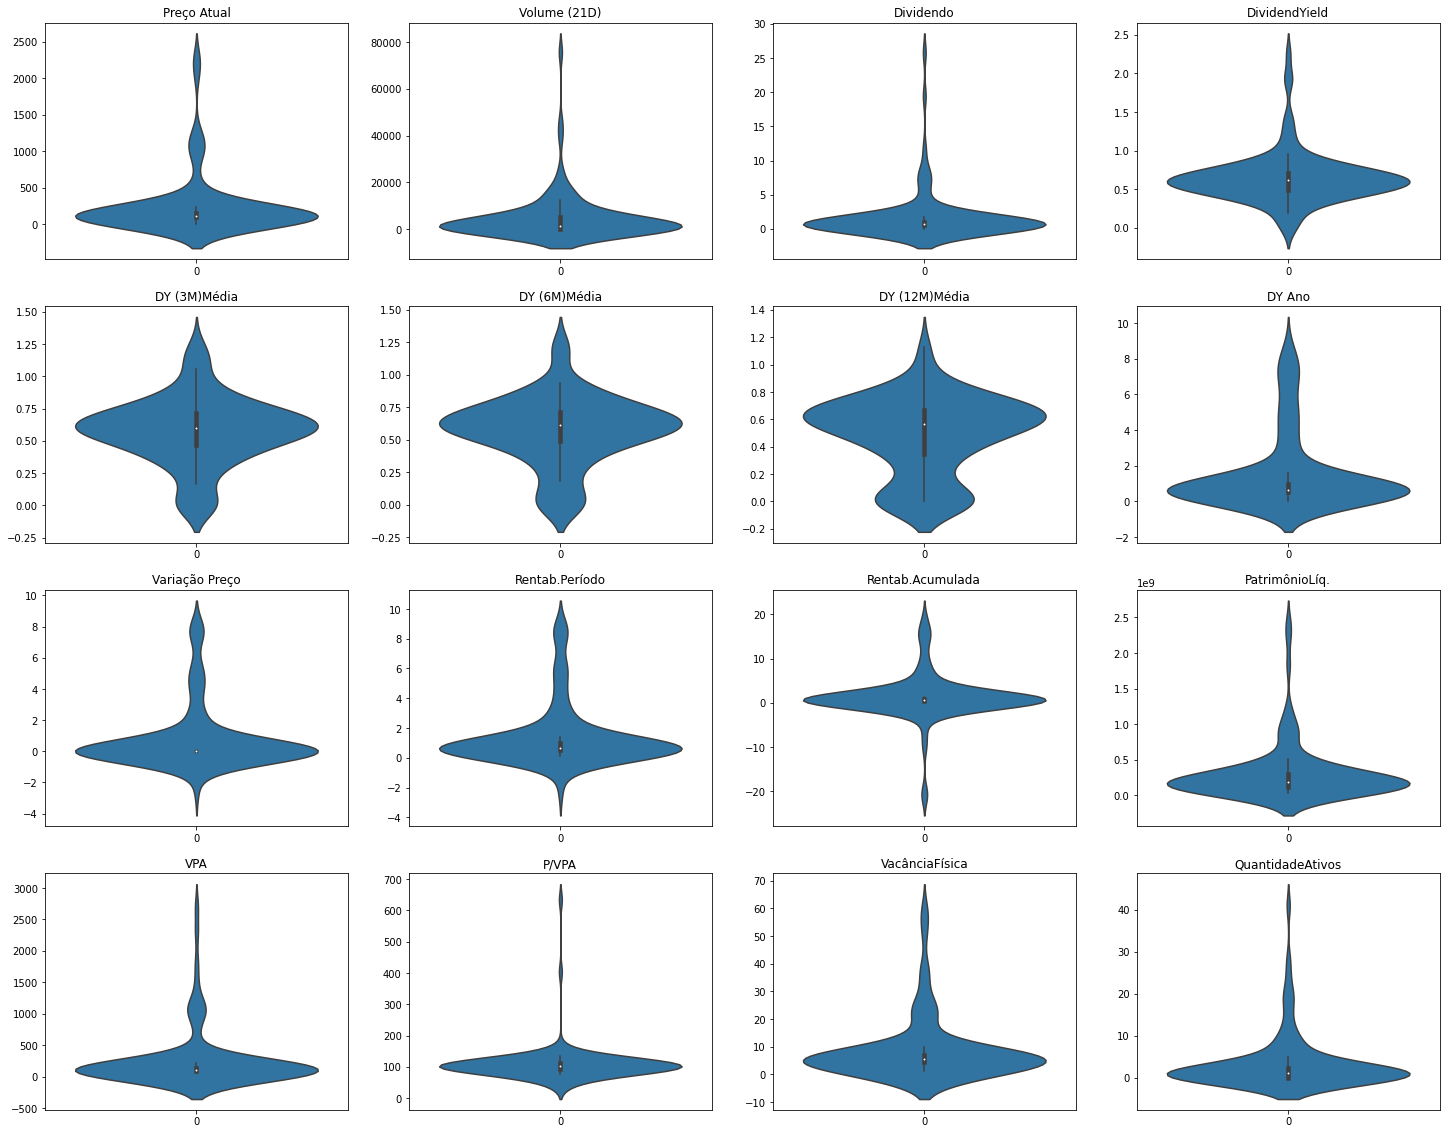

In [ ]:
#plot dos violinplots

plt.figure(figsize=(25,20))

for i in range(1,17):
  ax = plt.subplot(4,4,i)
  sns.violinplot(data = df2.iloc[:,i])
  ax.set_title(df2.columns[i])
  ax.set_xlabel("")
  ax.set_ylabel('')

## Análise Multivariável

<Figure size 2160x2160 with 0 Axes>

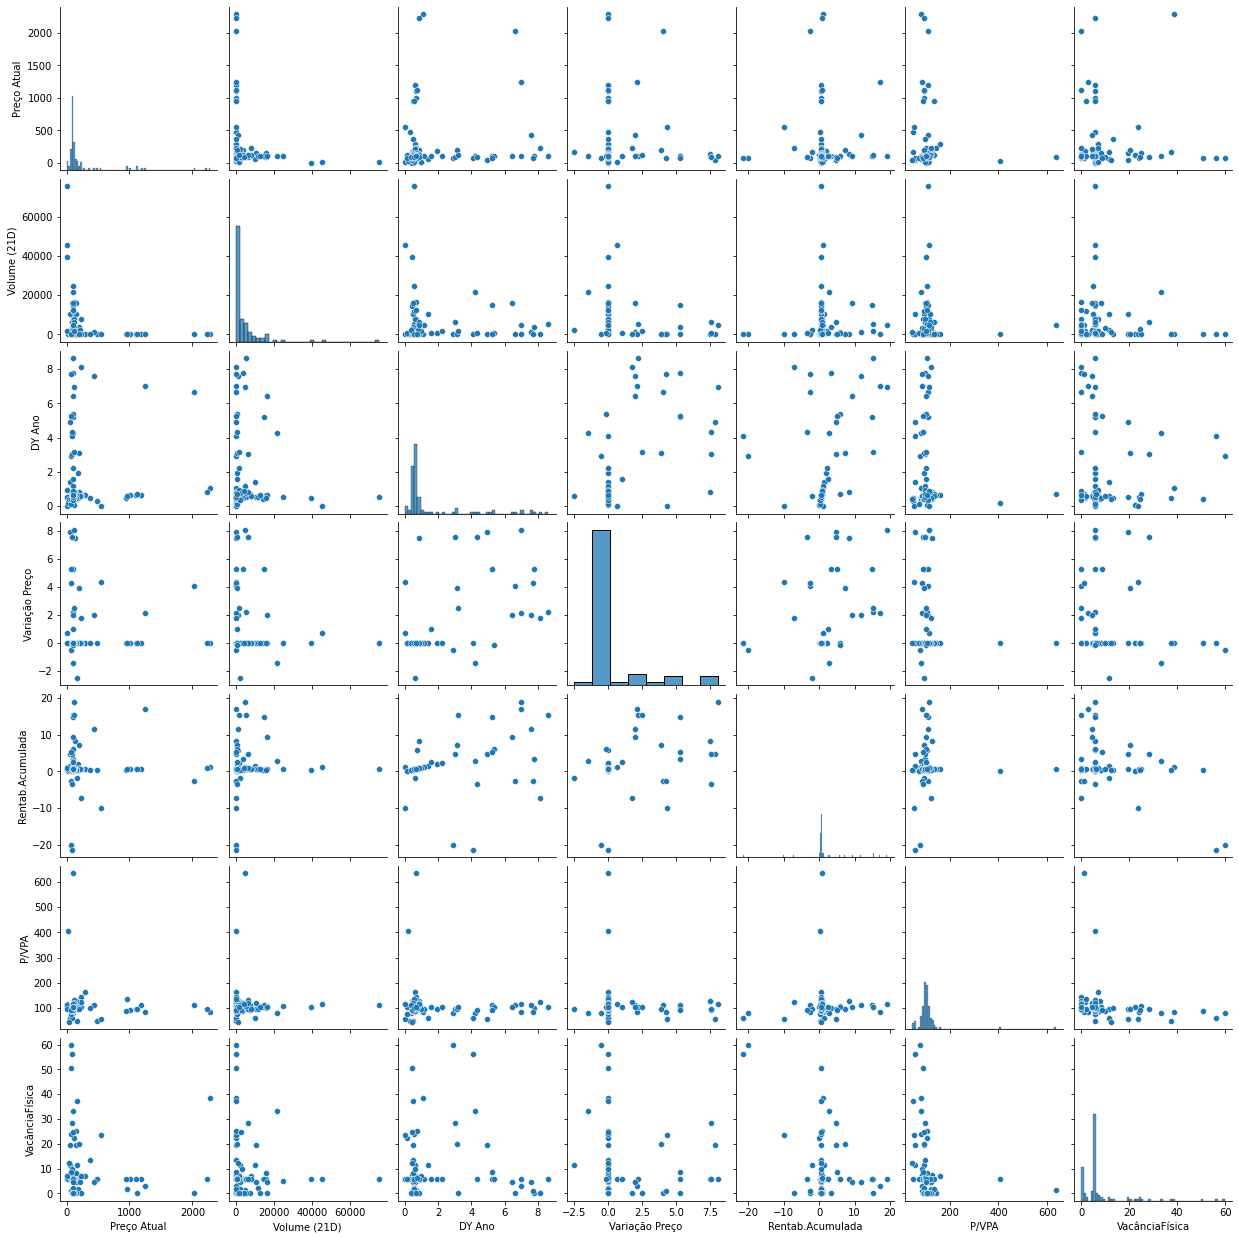

In [ ]:
cols2 = ["Setor","Preço Atual", "Volume (21D)", "DY Ano", "Variação Preço", "Rentab.Acumulada", "P/VPA", "VacânciaFísica"]

fig = plt.figure(figsize = (30,30))

sns.pairplot(data = df2[cols2])

In [ ]:
df2[cols2]

,Setor,Preço Atual,Volume (21D),DY Ano,Variação Preço,Rentab.Acumulada,P/VPA,VacânciaFísica
Códigodo fundo,,,,,,,,
ABCP11,Shoppings,94.35,4727.0,0.6937,0.0000,0.6937,634.41,1.200
AGCX11,Outros,1190.01,231.0,0.6303,0.0000,0.6303,111.46,5.715
ALZR11,Outros,98.29,3911.0,7.7861,5.2979,3.3298,100.92,0.000
ATSA11,Shoppings,113.99,0.0,0.0998,0.0000,0.0998,105.72,22.300
BBFI11B,Lajes Corporativas,2283.97,205.0,1.0790,0.0000,1.0790,84.55,38.590
...,...,...,...,...,...,...,...,...
WPLZ11,Shoppings,73.50,232.0,5.2718,5.2778,5.1692,92.15,8.600
XPCM11,Lajes Corporativas,97.24,4560.0,0.8646,0.0000,0.8646,117.46,0.000
XPIN11,Outros,119.20,1714.0,3.1838,2.4954,15.3237,103.01,0.000


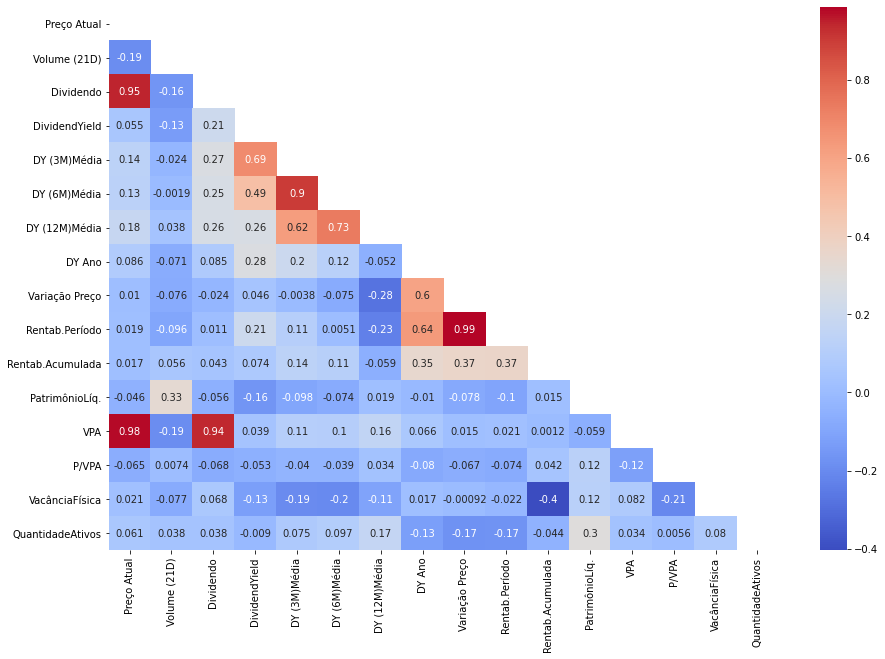

In [ ]:
figure = plt.figure(figsize=(15,10))

corr = df2.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr,mask = mask, annot = True, cmap='coolwarm')

O mapa de correlação entre as colunas possuíam valores de correlação menores, quanto comparamos com o mapa atual, provavelmente pela situação financeira diferente que estavam submetidos na época. No mapa de correlação atual, no entanto, temos uma crise mais itensificada que em 2019, de forma com que valores baixos (usualmente próximos, numericamente) são mais frequentes, por isto, deve afetar na correlação de forma maior. Temos correlações altas nas mesmas situações encontradas no mapa atual, no entanto.

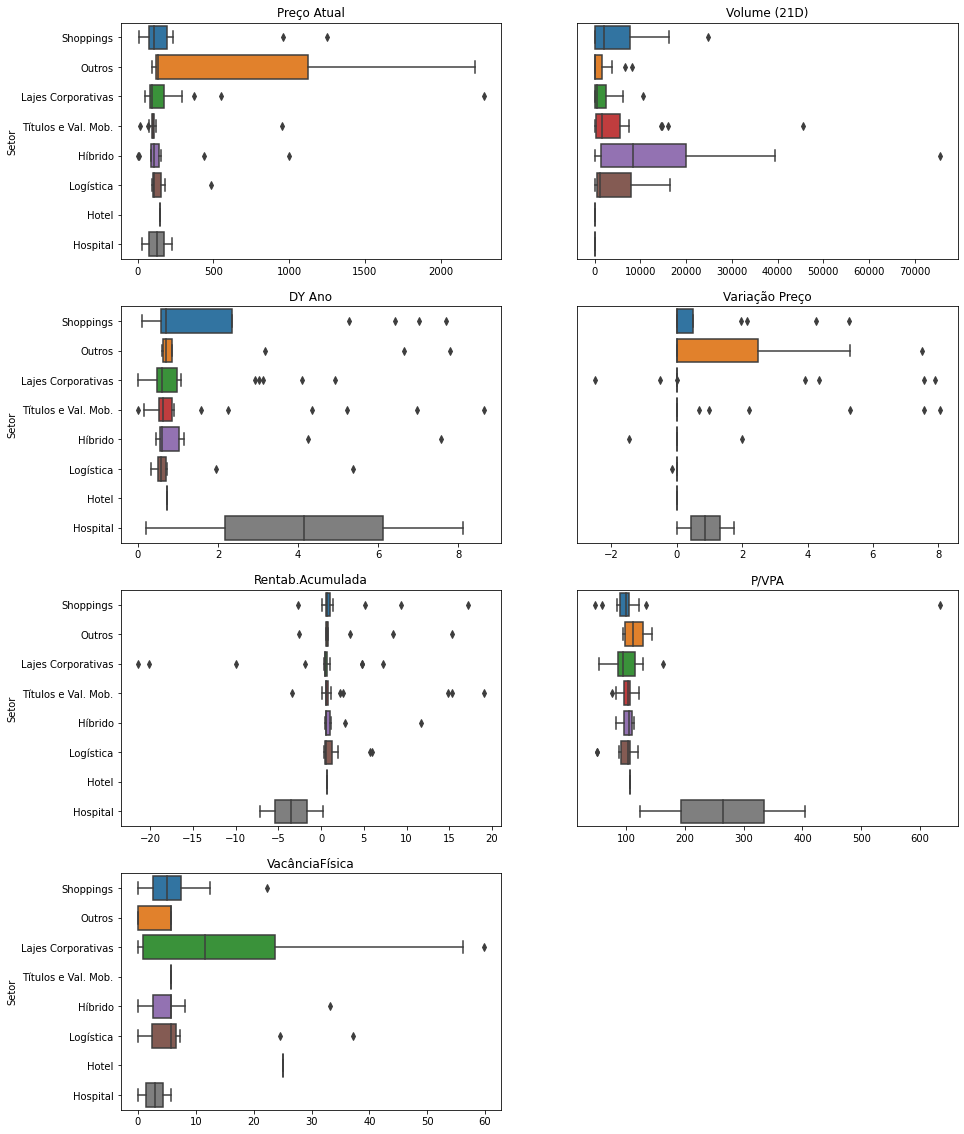

In [ ]:
plt.figure(figsize=(15,20))

for i in range(1,len(cols2)):
  ax = plt.subplot(4,2,i)
  sns.boxplot(x = df2[cols2[i]], y = df2.Setor)
  ax.set_title(cols2[i])
  ax.set_xlabel('')
  if i % 2 == 0:
    ax.set_ylabel('')
    ax.set_yticks([])

A primeira situação que podemos analisar é que o procedimento de tratamento de outliers, feito a partir da base atual, não possui características suficientes para tratá-los da mesma forma para a base de 2019.

Algumas diferenças significativas podem ser vistas quando comparamos os boxplots de 2019 vs atual. Por exemplo, o preço atual dos fundos em 2019 são significativamente mais caros que o atual. Temos praticamente todos os setores com valores positivos para a variação preço onde, na situação atual, a gigante maioria está negativa ou próxima de zero. O DY Ano, exceto para Hospital, sofreram mudanças não tão grandes com relação ao DY Ano atual. A Rentabilidade Acumulada também mostram valores positivos para a situação das FIIs em 2019, enquanto, atualmente, boa parte se encontra negativa. O P/VPA possui uma diferença enorme, também, de uma base para a outra. Os valores absolutos, para 2019, são bem maiores que os valores atuais. Podemos enxergar que, como um todo, a situação das FIIs, em 2019, estavam bem melhores que a situação atual e, com certeza, isso se deve pela situação econômica trazida pela crise sanitária do país com a COVID-19.

# 4. Análise Comparativa de 2021 vs 2019

Para esta etapa, criaremos variáveis que representam a interseção das FIIs de 2019 e 2021. Desta forma, podemos acompanhar, exclusivamente, as FIIs que estavam no mercado em 2019 e o que ocorreu com elas em 2021 de forma mais específica que as abordagens anteriores.

In [ ]:
#cria lista com index das empresas presentes em 2019 e 2021
empresas_2019 = list(df2.index)
empresas_2021 = list(df.index)

print(len(empresas_2019))
print(len(empresas_2021))

empresas = [empresa for empresa in empresas_2019 if empresa in empresas_2021]
print(len(empresas))

104
192
76


In [ ]:
df_empresas = df.loc[empresas]

df2_empresas = df2.loc[empresas]


## Visualização dos dados

Neste, abordaremos a problemática da seguinte forma:



1.   Análise comparativa dos FIIs em 2019 vs 2021
2.   Análise de variação dos FIIs em 20219 vs 2021

Para o primeiro passo, utilizaremos o conhecimento de matriz transposta para visualizarmos os dados com os FIIs no eixo x e o valor correspondente deste fundo (dada a coluna que foi representada graficamente) no eixo y. Outra informação importante é quanto a legenda destes gráficos, portanto, o comportamento representado com a cor <font color='orange'>laranja</font> são os valores presentes na base de 2019 e, com a cor <font color='blue'>azul</font>, os valores na base de 2021. 



### Dividend Yield

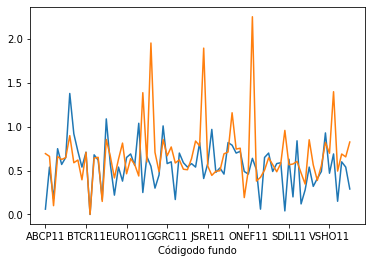

In [ ]:
plot_df = df_empresas
plot_df2 = df2_empresas

#Remoção da coluna Setor para poder mostrar as bases transpostas para análise das FIIs (dado que não dá para criar a transposta de um dado não-numérico)
#plot_df.drop(columns='Setor', axis = 1, inplace = True)
#plot_df2.drop(columns='Setor', axis = 1, inplace = True)

ax = plot_df['DividendYield'].T.plot()
plot_df2['DividendYield'].T.plot(ax=ax)

O Dividend Yield é uma métrica que, resumidamente, tende a nos dar indícios de um bom fundo. Por exemplo, um bom fundo possui alto Dividend Yield, apesar de não ser a única métrica qualitativa dele. Portanto, estabelecido que um Dividend Yield alto tende a significar um bom fundo para investimento, podemos observar que, apesar de alguns fundos estarem próximos do valor que tinham em 2019, vemos diversas quedas no valor dos Dividend Yield em 2021, portanto, a qualidade destes foi comprometida ao longo dos anos e alguns destes, outrora bons, não se saíram bem ao longo dos anos.

### Variação de Preço

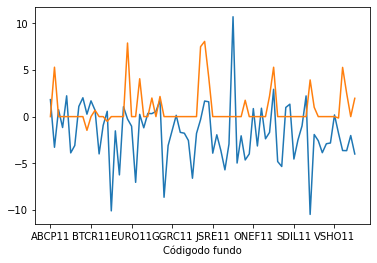

In [ ]:
ax = plot_df['Variação Preço'].T.plot()
plot_df2['Variação Preço'].T.plot(ax=ax)

Em questão da variação de preço, a estabilidade destes é relevante para os investidores mais conservadores e podem considerar esta uma característica atraente. No entanto, a estabilidade foi perdida, para estes fundos, quando olhamos a situação destes em 2021. Não só a variação não estabilizou em zero como há um declínio (em alguns casos, significativamente altos) nas curvas de variação de preço, mostrando a perca de valor destes, quando comparados com 2019.

### Rentabilidade Acumulada

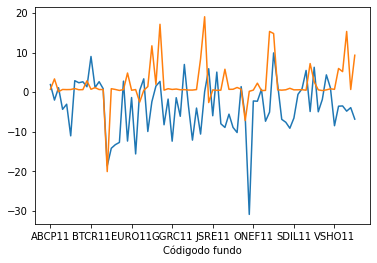

In [ ]:
ax = plot_df['Rentab.Acumulada'].T.plot()
plot_df2['Rentab.Acumulada'].T.plot(ax=ax)

A rentabilidade acumulada é o que podemos esperar de retorno do fundo investido e, como pode ser visto, dificilmente há um FII (dentro destes selecionados) que performam de maneira positiva. Na verdade, para a situação de 2021, em média, encontramos apenas prejuízos como retorno.

### P/VPA

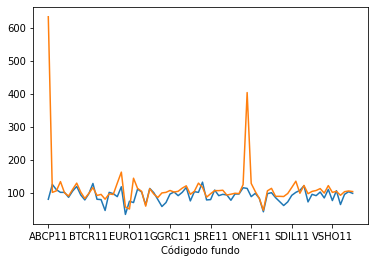

In [ ]:
ax = plot_df['P/VPA'].T.plot()
plot_df2['P/VPA'].T.plot(ax=ax)

O P/VPA não traz uma realidade positiva para 2021, pois ou o valor ficou próximo (ainda assim, menor) a 2019 em alguns casos, como em outros há uma grande variação dos FIIs que caíram consideravelmente o valor (lembrando que é interessante obter um P/VPA alto).

### Preço Atual

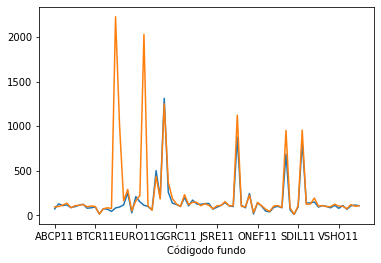

In [ ]:
ax = plot_df['Preço Atual'].T.plot()
plot_df2['Preço Atual'].T.plot(ax=ax)

Temos, de uma maneira geral, preços consistentes na comparação de 2019 vs 2021, com excessão de duas situações, o comportamento destes sofreram pequenas variações com o tempo. Para as duas excessões, no entanto, a queda de valor foi extrema, levando um destes fundos, por exemplo, de um preço atual próximo de 2300 reais para 80 reais. 

### DY Ano

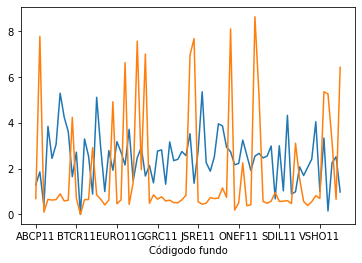

In [ ]:
ax = plot_df['DY Ano'].T.plot()
plot_df2['DY Ano'].T.plot(ax=ax)

Durante a análise do DY Ano, percebemos que alguns FIIs performaram melhor em 2021 do que em 2019. No entanto, é notável (e esperado) que diversos FIIs em 2019 possuíssem valores absolutos maiores do que estes valores para FIIs em 2021, dada as circunstânceas. Portanto, dos FIIs presentes, alguns melhoraram seu DY Ano, mas nunca chegaram num valor alto como era presente em FIIs de 2019.

### Vacância Física

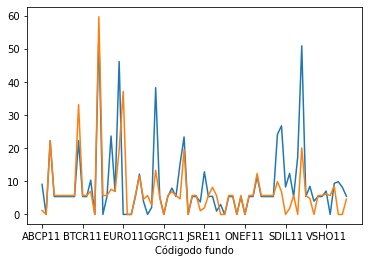

In [ ]:
ax = plot_df['VacânciaFísica'].T.plot()
plot_df2['VacânciaFísica'].T.plot(ax=ax)

Temos valores estacionários com relação a vacância física, de maneira geral, no entanto, alguns casos de 2021 mostram que a vacância física aumentou para determinados FIIs, onde este aumento representa uma característica negativa quanto a situação atual, onde os lugares possuem locais físicos desocupados e, para alguns setores, significa entrada menor de renda, implicitamente.

### VPA

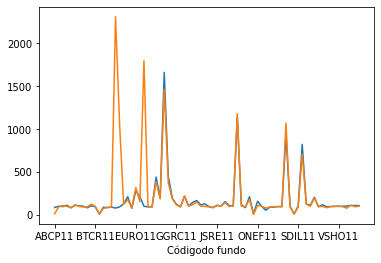

In [ ]:
ax = plot_df['VPA'].T.plot()
plot_df2['VPA'].T.plot(ax=ax)

Neste, com poucas excessões, o valor de patrimônio se manteve estável durante o período de 2019 e 2021.

## Variação dos FIIs

Para esta etapa, criamos uma base que representa a variancia percentual das duas bases trabalhadas para a análise da interseção dos FIIs. Desta forma, podemos quantificar, positiva ou negativamente, a variação ocorrida dentro do intervalo de tempo proposto.

In [ ]:
colunas_variacao = ['Preço Atual', 'Dividendo', 'P/VPA']

df_variacao_1921 = (df_empresas[colunas_variacao] - df2_empresas[colunas_variacao]) * 100 / df2_empresas[colunas_variacao]

df_variacao_1921.index = empresas
df_variacao_1921['Setor'] = df_empresas['Setor']

In [ ]:
df_variacao_1921

,Preço Atual,Dividendo,P/VPA,Setor
ABCP11,-24.917859,-61.538462,-87.389858,Shoppings
ALZR11,30.226880,3.737605,23.860484,Logística
ATSA11,-5.281165,150.000000,3.102535,Shoppings
BBRC11,-14.705882,-5.434783,-24.446439,Outros
BCFF11,1.431953,-5.660377,1.415805,Títulos e Val. Mob.
...,...,...,...,...
VTLT11,7.623762,-46.683728,1.825168,Logística
WPLZ11,-9.265306,-73.326220,-30.548020,Shoppings
XPIN11,-11.854027,-16.883117,-7.775944,Outros
XPLG11,12.847394,-8.955224,-2.119168,Logística


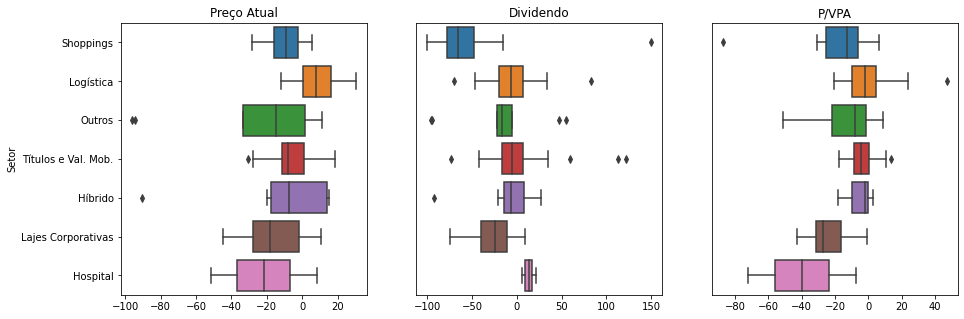

In [ ]:
fig = plt.figure(figsize=(15,5))

i = 0
for column in colunas_variacao: 
  i += 1
  ax = plt.subplot(1,3,i)
  ax = sns.boxplot(data = df_variacao_1921, y = 'Setor', x = column)
  ax.set_title(column)
  ax.set_xlabel('')
  if i > 1:
    ax.set_ylabel('')
    ax.set_yticks([])  

Como pode ser visto os resultados obtidos nessa operação para expressar a variação percentual qualitativa de algumas características dos FIIs, estas podem ser descritas abaixo:

*   O Preço Atual, com excessão de alguns FIIs do setor de Logística, estão majoritariamente variando negativamente, com casos próximos de 40% de queda
*   O Dividendo, com excessão de Hospital, estão em queda e, como exemplo mais explícito pelo gráfico temos os Shoppings, com Dividendo próximo de 70%-80% de declínio.
*   Para o P/VPA, para todos os setores (e excessão de poucos FIIs) temos um declínio de 2019 para 2021, com Hospital sendo o setor com maior declínio percentual.



# 5. Conclusão



É inegável a influência da situação atual vivida pelo país estaria representada em várias alçadas de investimento nacionais e isso não foi diferente para os FIIs. Temos uma situação majoritariamente de queda nos valores presentes nos FIIs e isso é mais explícito ainda quando comparamos ela numa situação anterior (neste caso, a situação dos FIIs em 2019). Houve, também, uma queda de representatividade de alguns setores, antes numerosos e, agora, escassos, como é o caso dos Shoppings, também pelo motivo da pandemia. É interessante e essencial para a análise de dados que o profissional entenda, além do tema/área (principalmente quando está fora de sua área de atuação ou interesse), o contexto socio-econômico implícito naqueles dados, principalmente numa análise comparativa de dois contextos diferentes.

Bem como esclarecer a visão de mundo que está inserida dentro desses dados, a análise exploratória também auxilia, como no caso do projeto proposto por nosso grupo, a criação de métricas qualitativas que foram feitas com estas e outras bases de FIIs, onde podemos controlar os BIASs de uma forma que faça sentido tanto para o analista como, também, um economista poderia auxiliar a construção deste, dado que eles são os especialistas no assunto.

Dado qualquer prazo para ser feita uma EDA, é notório que sempre haverá mais informações que podemos retirar destas representações (ou até mesmos diferentes representações para chegarmos em outras informações) e será uma situação vivida diversas vezes quando seguimos esta carreira. O importante é absorver as diversas técnicas de representação e análise e, com certeza, a EDA posterior se beneficiará da experiência adquirida ao longo da prática e trará mais substância para a análise.

# 6. Referências Bibliográficas

CARVALHO, Thiago. Heatmap Basics with Seaborn, 29 de Jun. de 2020. Disponível em: <https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c>. Acesso em: 14 Mai. de 2021.

Plotting with categorical data. Seaborn. Disponível em: <http://seaborn.pydata.org/tutorial/categorical.html?highlight=bar%20plot>. Acesso em: 14 de Mai. de 2021.

Visualizing distributions of data. Seaborn. Disponível em: <https://seaborn.pydata.org/tutorial/distributions.html>. Acesso em: 14 de Mai. de 2021.

CHAVES, Ana Clara. et al. Título: Análise exploratória das inscrições no processo seletivo da TAIL 2020. Disponível em: <https://github.com/TailUFPB/DataScience/blob/main/EDA/exploratoriaTAIL.ipynb>. Acesso em: 26 de Mai. de 2021.

GAUDENCIO, Thais. Visualização de dados. Notas de aula.

PERRUCHO, Breno (Canal Jovem de Negócios). Como escolher o MELHOR FUNDO IMOBILIÁRIO (FII) da BOLSA DE VALORES. Youtube, 14 de Jan. de 2019. Disponível em: <https://www.youtube.com/watch?v=VUwU9wt2s7w&t=723s&ab_channel=JovensdeNeg%C3%B3cios>. Acesso em: 5 de Mai. de 2021.